In [10]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.15.4'

## Data
We use a random sample of social media influence scores from the service Klout.com as presented in Udacity's Intro to Inferential Statistics. Of a population of 620+ milion scores we got a sample size $n=1048$.

In [4]:
url = 'https://raw.githubusercontent.com/ianlim28/NoteBooks-Statistics-and-MachineLearning/master/data/klout-scores.csv'
data = pd.read_csv(url, header = None, names = ['scores'])
data.head()

      scores
0  25.104179
1  60.908747
2  23.222238
3  51.553491
4  22.629690

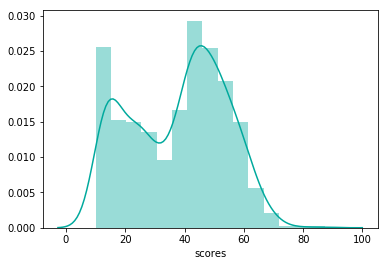

In [7]:
# Plot the sample and note the bimodal distribution shape
# The first peak are social media consumers, second peak influencers
sns.distplot(data.scores)

In [9]:
# sample size
n = len(data)

# confidence coefficient
confidence_coef = .95

# the alpha level
alpha = 1 - confidence_coef

## Confidence Interval
If we want to estimate a population parameter (mean, proportion, standard deviation) from a sample statistic, we can never be sure of our outcome. But we can give some level of confidence of our prediction; the confidence interval (CI). We use the following symbols to depict parameters and statistics.

population mean: $\mu$ (parameters)<br> 
population std dev: $\sigma$ (parameters)<br>
sample mean: $\bar{x}$ (statistics)<br>
sample std dev: $s$ (statistics)<br>

Let's calculate 95% the confidence interval of the sample mean of Klout Scores.

**Sample Mean**

In [11]:
# First we need our sample mean
# This is called the point estimate
klout_xbar = data.scores.mean()
klout_xbar

37.719054832538156

**Sample Standard Deviation**

In [12]:
# We also need the standard error of the sample
# Since our sample size is large (> 30) we can use
# the sample standard deviation as an approximation of sigma
klout_s = data.scores.std()
klout_s

16.04431497904899

**Getting the Z-score to calculate confidence interval**

In [13]:
zscore_interval = stats.norm.interval(alpha=confidence_coef)
zscore_interval

(-1.959963984540054, 1.959963984540054)

In [14]:
# or alternatively, you can get the critical value this way
critical_value = stats.norm.ppf(alpha / 2) * -1.
critical_value

1.959963984540054

**Standard Error**<br>
Standard error is standard deviation divided by square root of n

$\frac{\sigma}{\sqrt{n}}$

In [15]:
# We need the standard error to calculate the bounds
klout_SE = klout_s / math.sqrt(n)
klout_SE

0.49561054484656264

In [16]:
# Calculate the lower and upper bound Klout Score 
# for the confidence interval
klout_CI_mean_lower = klout_xbar - critical_value * klout_SE
klout_CI_mean_upper = klout_xbar + critical_value * klout_SE
klout_CI_mean_lower, klout_CI_mean_upper

(36.74767601428062, 38.69043365079569)

## So what does it all mean?
A confidence interval is a 'parameter catcher'. In this case we try to catch the real population mean from a sample by declaring a confidence interval. This mean we are 95% sure that the real population mean of Klout Scores lies somewhere fixed between 36.75 and 38.69.

## The effect of sample size
Sample size effects the bounds of the confidence interval. The smaller the sample, the less confident we are, so the wider the confidence interval. Let's try this with a random sample from the Klout Score data of $n=50$.

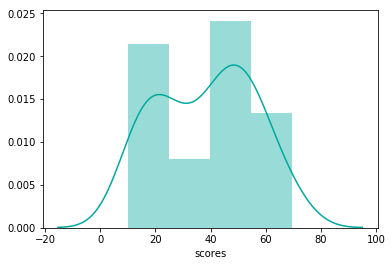

In [17]:
# Let's create a sample of 50 random Klout Scores
n_50 = 50
data_50 = data.ix[np.random.choice(data.index, n_50)]

# Plot the sample and note a similar bimodal distribution shape
p=sns.distplot(data_50.scores)

In [18]:
# Get the point estimate
klout_50_xbar = data_50.scores.mean()


# Get the sample standard deviation as an approximation of sigma
klout_50_s = data_50.scores.std()


# Calculate the standard error for this sample size
klout_50_SE = klout_50_s / math.sqrt(n_50)

# Calculate the lower and upper bound Klout Score 
# for the confidence interval of our sample of n=50
klout_50_CI_mean_lower = klout_50_xbar - critical_value * klout_50_SE
klout_50_CI_mean_upper = klout_50_xbar + critical_value * klout_50_SE
klout_50_CI_mean_lower, klout_50_CI_mean_upper

(33.43782645170973, 43.091606423890276)

See how this confidence interval is a lot wider? Thats because our sample size is smaller!